# Chat with local and remote llms

## Generic Python chat API : litellm and lisette 

In [1]:
!uv add lisette

Resolved 280 packages in 0.74ms
Audited 180 packages in 1ms


In [2]:
from importlib.metadata import version

**LiteLLM**

Call 100+ LLMs using the OpenAI Input/Output Format
- Translate inputs to provider's completion, embedding, and image_generation endpoints
- Consistent output, text responses will always be available at ['choices'][0]['message']['content']
- Retry/fallback logic across multiple deployments (e.g. Azure/OpenAI) - Router
- Track spend & set budgets per project LiteLLM Proxy Server

https://docs.litellm.ai/docs/

In [3]:
version("litellm")

'1.80.0'

**lisette**

Lisette is a wrapper for the LiteLLM Python SDK, which provides unified access to 100+ LLM providers using the OpenAI API format.

LiteLLM provides a unified interface to access multiple LLMs, but it’s quite low level: it leaves the developer to do a lot of stuff manually. 
    
Lisette automates pretty much everything that can be automated, whilst providing full control. Amongst the features provided:
- A Chat class that creates stateful dialogs across any LiteLLM-supported model
- Convenient message creation utilities for text, images, and mixed content
- Simple and convenient support for tool calling with automatic execution
- Built-in support for web search capabilities (including citations for supporting models)
- Streaming responses with formatting
- Full async support with AsyncChat
- Prompt caching (for supporting models)

To use Lisette, you’ll need to set the appropriate API keys as environment variables for whichever LLM providers you want to use.
  
https://lisette.answer.ai/

In [4]:
version("lisette")

'0.0.13'

In [5]:
from lisette import *

In [6]:
def model_introduction(model):
    chat = Chat(model)
    res = chat("Please tell me about yourself in one brief sentence.")
    display(res)

### Chat with ollama - local models

**Load ollama model**

ollama will automatically load any model you choose on the first request.

**Chat with local model**

In [12]:
model = "ollama/gemma3:4b"

model_introduction(model)

I’m a large language model, a sophisticated AI assistant created by Google, here to provide information and assist you with a wide range of tasks through text-based conversations.

<details>

- id: `chatcmpl-e84110fb-5499-450d-b4a9-40a08208d55e`
- model: `ollama/gemma3:4b`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=36, prompt_tokens=24, total_tokens=60, completion_tokens_details=None, prompt_tokens_details=None)`

</details>

**Unload the ollama model**

You should manually unload the model when you are finished using it.

In [13]:
!ollama ps

NAME         ID              SIZE      PROCESSOR    CONTEXT    UNTIL   
gemma3:4b    a2af6cc3eb7f    5.5 GB    100% GPU     8192       Forever    


In [15]:
!ollama stop gemma3:4b

### Chat with vLLM - local model

**Patch lisette**

lisette v 0.0.13 is not compatible with vLLM. Two calls to get_model_info fail because litellm can not give model info for local vLLM models.

Comment out the following line

```
File /home/workspace/wordslab-llms/.venv/lib/python3.12/site-packages/lisette/core.py:271, in Chat._call(self, msg, prefill, temp, think, search, stream, max_steps, step, final_prompt, tool_choice, **kwargs)
--> 271 if not get_model_info(self.model).get("supports_assistant_prefill"): prefill=None

File /home/workspace/wordslab-llms/.venv/lib/python3.12/site-packages/lisette/core.py:210, in _has_search(m)
--> 210     i = get_model_info(m)
```

**Launch vLLM**

Open a terminal and execute the commands below to start serving a specific model with vLLM:

```bash
cd $WORDSLAB_WORKSPACE/wordslab-llms
source .venv/bin/activate

vllm serve Qwen/Qwen3-0.6B
```

**Chat with the local model**

In [7]:
import os

os.environ["HOSTED_VLLM_API_BASE"] = "http://localhost:8000/v1/"

In [8]:
model = "hosted_vllm/Qwen/Qwen3-0.6B"

model_introduction(model)

<think>
Okay, the user wants me to tell them about myself in one brief sentence. Let me think. I need to be concise but cover key points. Maybe start with my name, then mention my role, and a bit about my skills or interests. Let me check if I can fit all that in without being too long. Also, make sure it's friendly and clear. Let me try: "I am a helpful and curious AI assistant who can assist you with questions and tasks." That sounds good. Let me double-check for any redundancy or missing information. Yeah, that works.
</think>

I am a helpful and curious AI assistant who can assist you with questions and tasks.

<details>

- id: `chatcmpl-98fc341dcccf44098ffdb699354d87dc`
- model: `hosted_vllm/Qwen/Qwen3-0.6B`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=139, prompt_tokens=18, total_tokens=157, completion_tokens_details=None, prompt_tokens_details=None)`

</details>

**Stop vLLM**

Go to the terminal in which you launched vLLM.

Press [Ctrl] + c

### Chat with OpenRouter - remote models

In [7]:
import os

os.environ["OPENROUTER_API_KEY"] = "sk-or-v1-83239xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

In [8]:
model = "openrouter/mistralai/mistral-medium-3.1"

model_introduction(model)

I’m an AI assistant designed to provide helpful, accurate, and creative responses to your questions—whether you need information, ideas, or just a friendly chat! 😊

<details>

- id: `gen-1763414499-o2bWV6szGbRwh9Fca5dk`
- model: `mistralai/mistral-medium-3.1`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=36, prompt_tokens=13, total_tokens=49, completion_tokens_details=CompletionTokensDetailsWrapper(accepted_prediction_tokens=None, audio_tokens=None, reasoning_tokens=0, rejected_prediction_tokens=None, text_tokens=None, image_tokens=0), prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=0, cached_tokens=0, text_tokens=None, image_tokens=None, video_tokens=0), cost=7.72e-05, is_byok=False, cost_details={'upstream_inference_cost': None, 'upstream_inference_prompt_cost': 5.2e-06, 'upstream_inference_completions_cost': 7.2e-05})`

</details>

### Chat with Huggingface inference - remote models

In [9]:
import os

os.environ["HF_TOKEN"] = "hf_eqRxxxxxxxxxxxxxxxxxxxxxxxxxxx"

In [11]:

model = "huggingface/cerebras/zai-org/GLM-4.6"

model_introduction(model)


I am a large language model trained by Google to be helpful and harmless.

<details>

- id: `chatcmpl-ff126793-b772-4374-b3e3-6ec961c275ff`
- model: `zai-glm-4.6`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=1071, prompt_tokens=15, total_tokens=1086, completion_tokens_details=None, prompt_tokens_details=None)`

</details>

## lisette Chat API tutorial

In [48]:
model = "ollama/gemma3:4b"

### Conversation with multiple messages

In [23]:
chat = Chat(model)
res = chat(['Hi! My favorite drink is coffee.', 'Hello!', 'Whats my favorite drink?'])
display(res)

Your favorite drink is coffee! 😊 

It’s great to hear you enjoy it! Would you like to talk more about coffee – like your favorite kind, or how you take it?

<details>

- id: `chatcmpl-4b1e657d-6f95-40a1-b246-63d5fa871090`
- model: `ollama/gemma3:4b`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=40, prompt_tokens=29, total_tokens=69, completion_tokens_details=None, prompt_tokens_details=None)`

</details>

### Streaming

In [51]:
chat = Chat(model)
res_gen = chat("Concisely, what are the top 10 biggest animals?", stream=True)
res_gen

<generator object Chat._call at 0x7429d396add0>

In [52]:
from litellm import ModelResponse, ModelResponseStream
for chunk in res_gen:
    if isinstance(chunk,ModelResponseStream): print(chunk.choices[0].delta.content,end='')

Okay, here’s a list of the top 10 biggest animals by size (primarily by length and/or mass):

1.  **Blue Whale** (Mammal) – Largest animal on Earth
2.  **Fin Whale** (Mammal)
3.  **North Atlantic Right Whale** (Mammal)
4.  **Sperm Whale** (Mammal)
5.  **African Bush Elephant** (Mammal)
6.  **Giraffe** (Mammal)
7.  **Polar Bear** (Mammal)
8.  **Saltwater Crocodile** (Reptile)
9.  **Green Anaconda** (Reptile)
10. **Bowhead Whale** (Mammal)



**Note:** Rankings can vary slightly depending on the measurement criteria (length, weight, etc.).None

In [53]:
chunk

Okay, here’s a list of the top 10 biggest animals by size (primarily by length and/or mass):

1.  **Blue Whale** (Mammal) – Largest animal on Earth
2.  **Fin Whale** (Mammal)
3.  **North Atlantic Right Whale** (Mammal)
4.  **Sperm Whale** (Mammal)
5.  **African Bush Elephant** (Mammal)
6.  **Giraffe** (Mammal)
7.  **Polar Bear** (Mammal)
8.  **Saltwater Crocodile** (Reptile)
9.  **Green Anaconda** (Reptile)
10. **Bowhead Whale** (Mammal)



**Note:** Rankings can vary slightly depending on the measurement criteria (length, weight, etc.).

<details>

- id: `chatcmpl-2b1fade8-d572-4134-80a2-564b42adfc03`
- model: `gemma3:4b`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=180, prompt_tokens=28, total_tokens=208, completion_tokens_details=CompletionTokensDetailsWrapper(accepted_prediction_tokens=None, audio_tokens=None, reasoning_tokens=0, rejected_prediction_tokens=None, text_tokens=None), prompt_tokens_details=None)`

</details>

### Images

In [24]:
from pathlib import Path
from IPython.display import Image

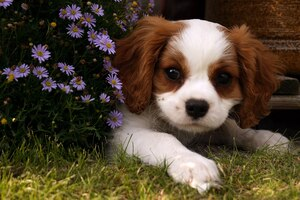

In [26]:
fn = Path('sample-image.jpg')
img = fn.read_bytes()
Image(img)

In [28]:
chat = Chat(model)
chat([img, "What's in this image? Be brief."])

A Cavalier King Charles Spaniel puppy with purple flowers in the background.

<details>

- id: `chatcmpl-9df94dcd-0b5b-48a1-9188-5214a1300ce4`
- model: `ollama/gemma3:4b`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=16, prompt_tokens=284, total_tokens=300, completion_tokens_details=None, prompt_tokens_details=None)`

</details>

### Prefill the beginning of the answer

In [31]:
chat = Chat(model)
chat("Concisely, what's the meaning of life?", prefill="According to Douglas Adams, ")

According to Douglas Adams, “42.” 

(This is a reference to *The Hitchhiker's Guide to the Galaxy*, where a supercomputer spends 7.5 million years calculating the answer to the ultimate question of life, the universe, and everything, and provides the answer as 42.)

---

**Note:** This is a deliberately humorous and iconic response reflecting a common understanding of the question's difficulty. There's no single, universally accepted answer to the meaning of life.

<details>

- id: `chatcmpl-32cbd5ef-d6dd-4af0-adb3-dda69103f10e`
- model: `ollama/gemma3:4b`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=101, prompt_tokens=37, total_tokens=138, completion_tokens_details=None, prompt_tokens_details=None)`

</details>

### Tools

In [45]:
model = "ollama/qwen3:8b"

In [46]:
def add_numbers(
    a: int,  # First number to add
    b: int   # Second number to add  
) -> int:
    "Add two numbers together"
    return a + b

In [47]:
chat = Chat(model, tools=[add_numbers])
res = chat("What's 47 + 23? Use the tool.", max_steps=3, return_all=True)
display(*res)



🔧 add_numbers({"a": 47, "b": 23})


<details>

- id: `chatcmpl-298efeb9-050e-4c2c-896a-8e430cb145aa`
- model: `ollama/qwen3:8b`
- finish_reason: `tool_calls`
- usage: `Usage(completion_tokens=25, prompt_tokens=160, total_tokens=185, completion_tokens_details=None, prompt_tokens_details=None)`

</details>

{'tool_call_id': 'call_658f1cc7-d98c-40fe-8727-3a8ae343289f',
 'role': 'tool',
 'name': 'add_numbers',
 'content': '70'}



🔧 add_numbers({"a": 70, "b": 0})


<details>

- id: `chatcmpl-8eefe31e-4268-4338-8505-82d040a703a6`
- model: `ollama/qwen3:8b`
- finish_reason: `tool_calls`
- usage: `Usage(completion_tokens=24, prompt_tokens=263, total_tokens=287, completion_tokens_details=None, prompt_tokens_details=None)`

</details>

{'tool_call_id': 'call_d85e94bb-1d62-4a05-8bfb-db077695a0e1',
 'role': 'tool',
 'name': 'add_numbers',
 'content': '70'}



🔧 add_numbers({"a": 70, "b": 0})


<details>

- id: `chatcmpl-3568a275-dc46-44f5-baee-033a0d5d4653`
- model: `ollama/qwen3:8b`
- finish_reason: `tool_calls`
- usage: `Usage(completion_tokens=24, prompt_tokens=406, total_tokens=430, completion_tokens_details=None, prompt_tokens_details=None)`

</details>

{'tool_call_id': 'call_7ce081e8-b42b-47f2-972d-51c789f0c960',
 'role': 'tool',
 'name': 'add_numbers',
 'content': '70'}